In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from mpl_toolkits.mplot3d import axes3d

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 24})

In [93]:
from sample_3d_view import sample_sphere, sample_torus, visualize_grid_sphere, visualize_grid_torus, sample_ellipsoid, genus_two, genus_three

In [5]:
from local_pca_utils import make_nearest_neighbors_graph, make_tangents, make_2nd_order_laplacian,make_general_order_laplacian, make_connection

from curvature_utils import make_tangents_and_normals, get_second_fundamental_form

from tensorlaplacian_utils import get_riemannian_ricci_scalar, get_weitzenbock_operator, get_eigvals_of_weitzenbock,weitzenbock_to_bsr

In [6]:
npoints = 10000

In [7]:
# Dataset definitions
#sphere = sample_sphere(npoints)


In [8]:
xx, yy = np.meshgrid(np.concatenate((np.linspace(-1,1,10), np.linspace(1,2,10))),np.concatenate((np.linspace(-1,1,10), np.linspace(1,2,10))))

In [9]:
xx, yy = np.meshgrid([1,2,3],[4,5,6])

In [10]:
xx

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [11]:
data = genus_three()

NameError: name 'genus_three' is not defined

In [ ]:
data.shape

In [ ]:
npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 40, n=npoints)
tangents, normals, local_coords, h_total, true_h = get_second_fundamental_form(data, graph, 2)
riem, ric, sc = get_riemannian_ricci_scalar(true_h)

In [12]:
data.shape

NameError: name 'data' is not defined

NameError: name 'data' is not defined

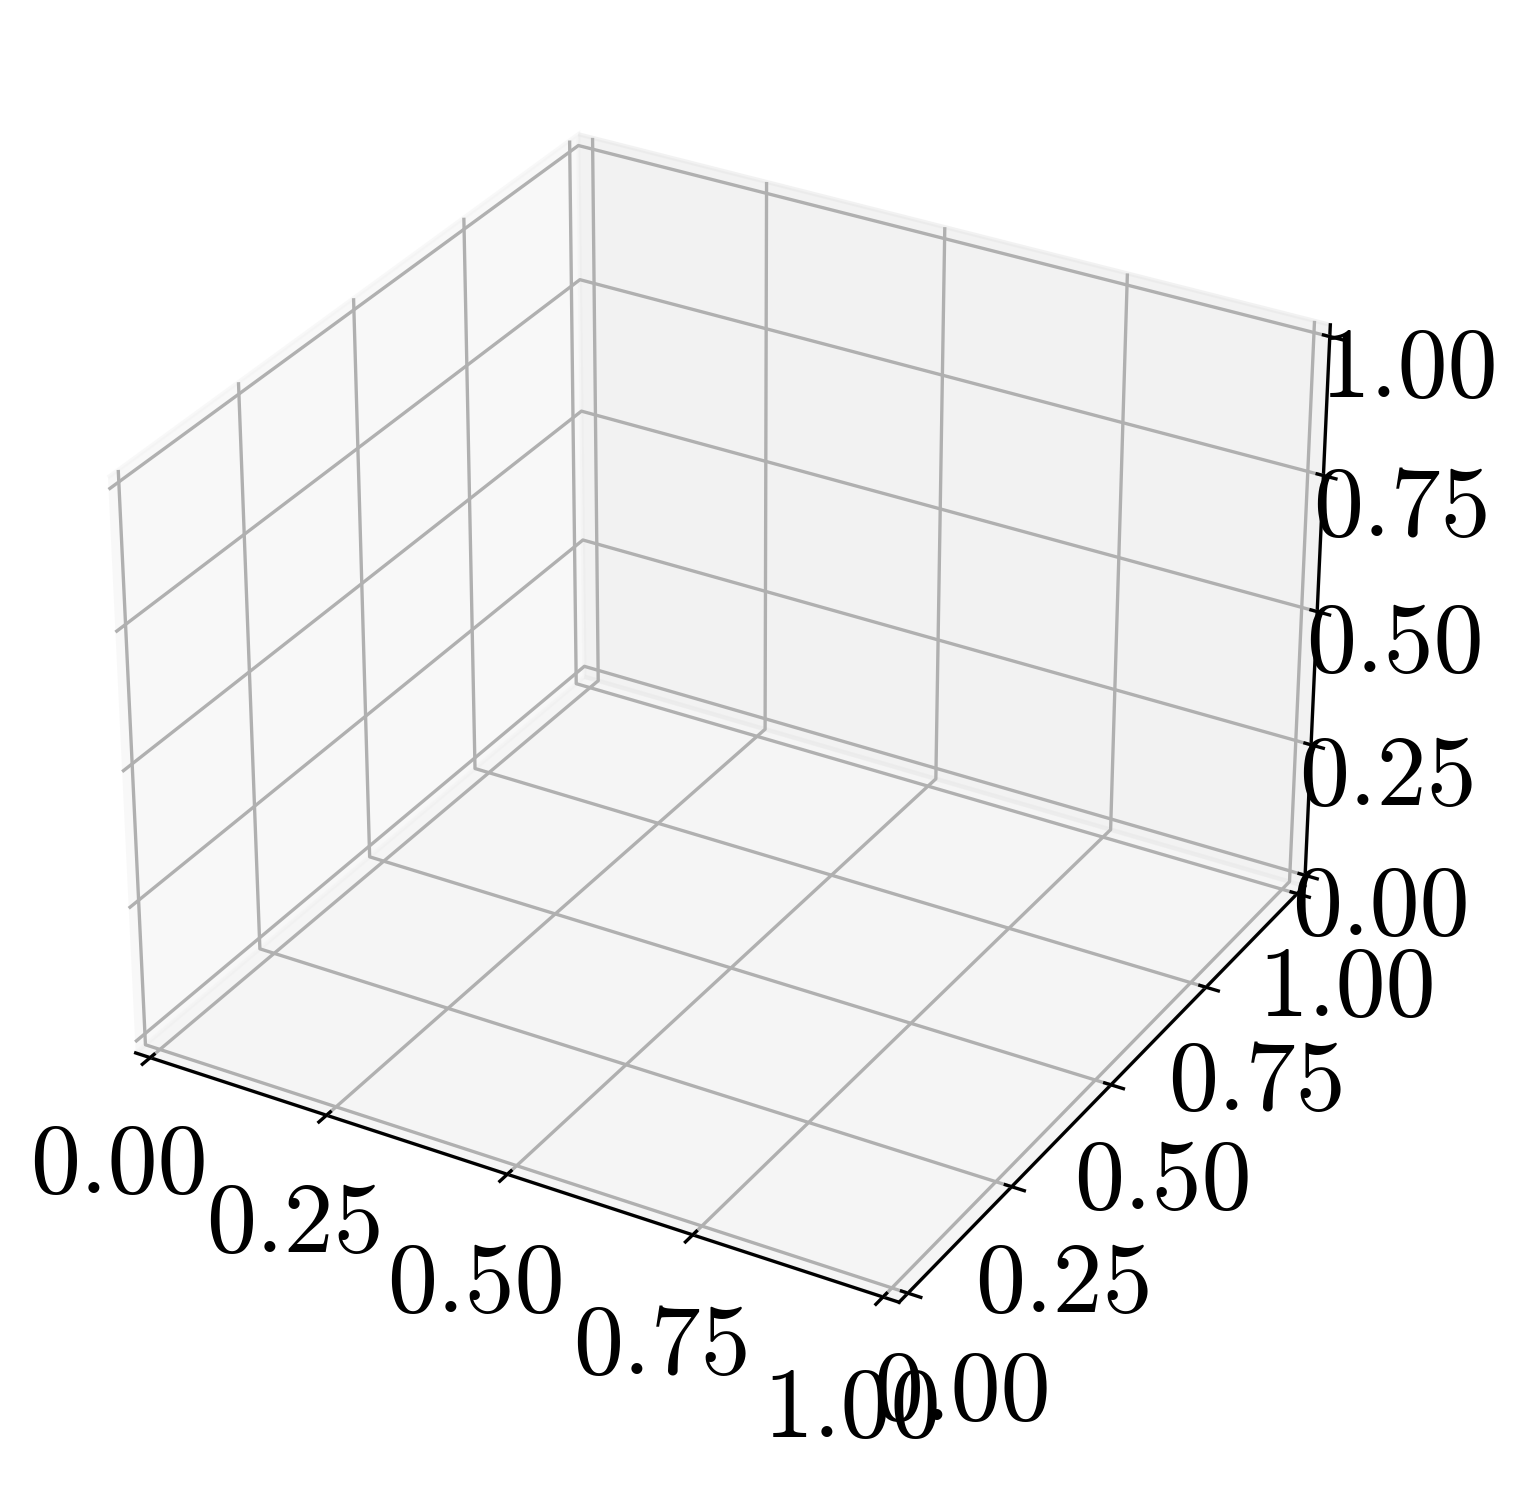

In [13]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
#ax.set_box_aspect([2,2,1])
#fig, ax = visualize_grid_torus(30,2,1)
#ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, c=sc, cmap='viridis',zorder=10, alpha=0.5)
ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, c=sc, cmap='viridis',zorder=10,norm = mpl.colors.Normalize(vmin=-5, vmax=1, clip=False), alpha=0.5)
ax.view_init(60, 40)
#ax.view_init(20, 100)


In [14]:
data = genus_two()

In [15]:
data.shape

(21880, 3)

In [122]:
data = genus_three()

In [123]:
data*=10

In [125]:
data.shape

(7732, 3)

In [126]:
npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 20, n=npoints)
tangents, normals, local_coords, h_total, true_h = get_second_fundamental_form(data, graph, 2)
riem, ric, sc = get_riemannian_ricci_scalar(true_h)

100%|██████████| 7732/7732 [00:02<00:00, 3756.25it/s]


(array([4.000e+00, 4.000e+00, 4.000e+00, 1.200e+01, 1.200e+01, 3.200e+01,
        6.400e+01, 1.000e+02, 6.640e+02, 6.836e+03]),
 array([-4.65316304, -4.16528128, -3.67739952, -3.18951776, -2.701636  ,
        -2.21375424, -1.72587248, -1.23799072, -0.75010896, -0.2622272 ,
         0.22565456]),
 <BarContainer object of 10 artists>)

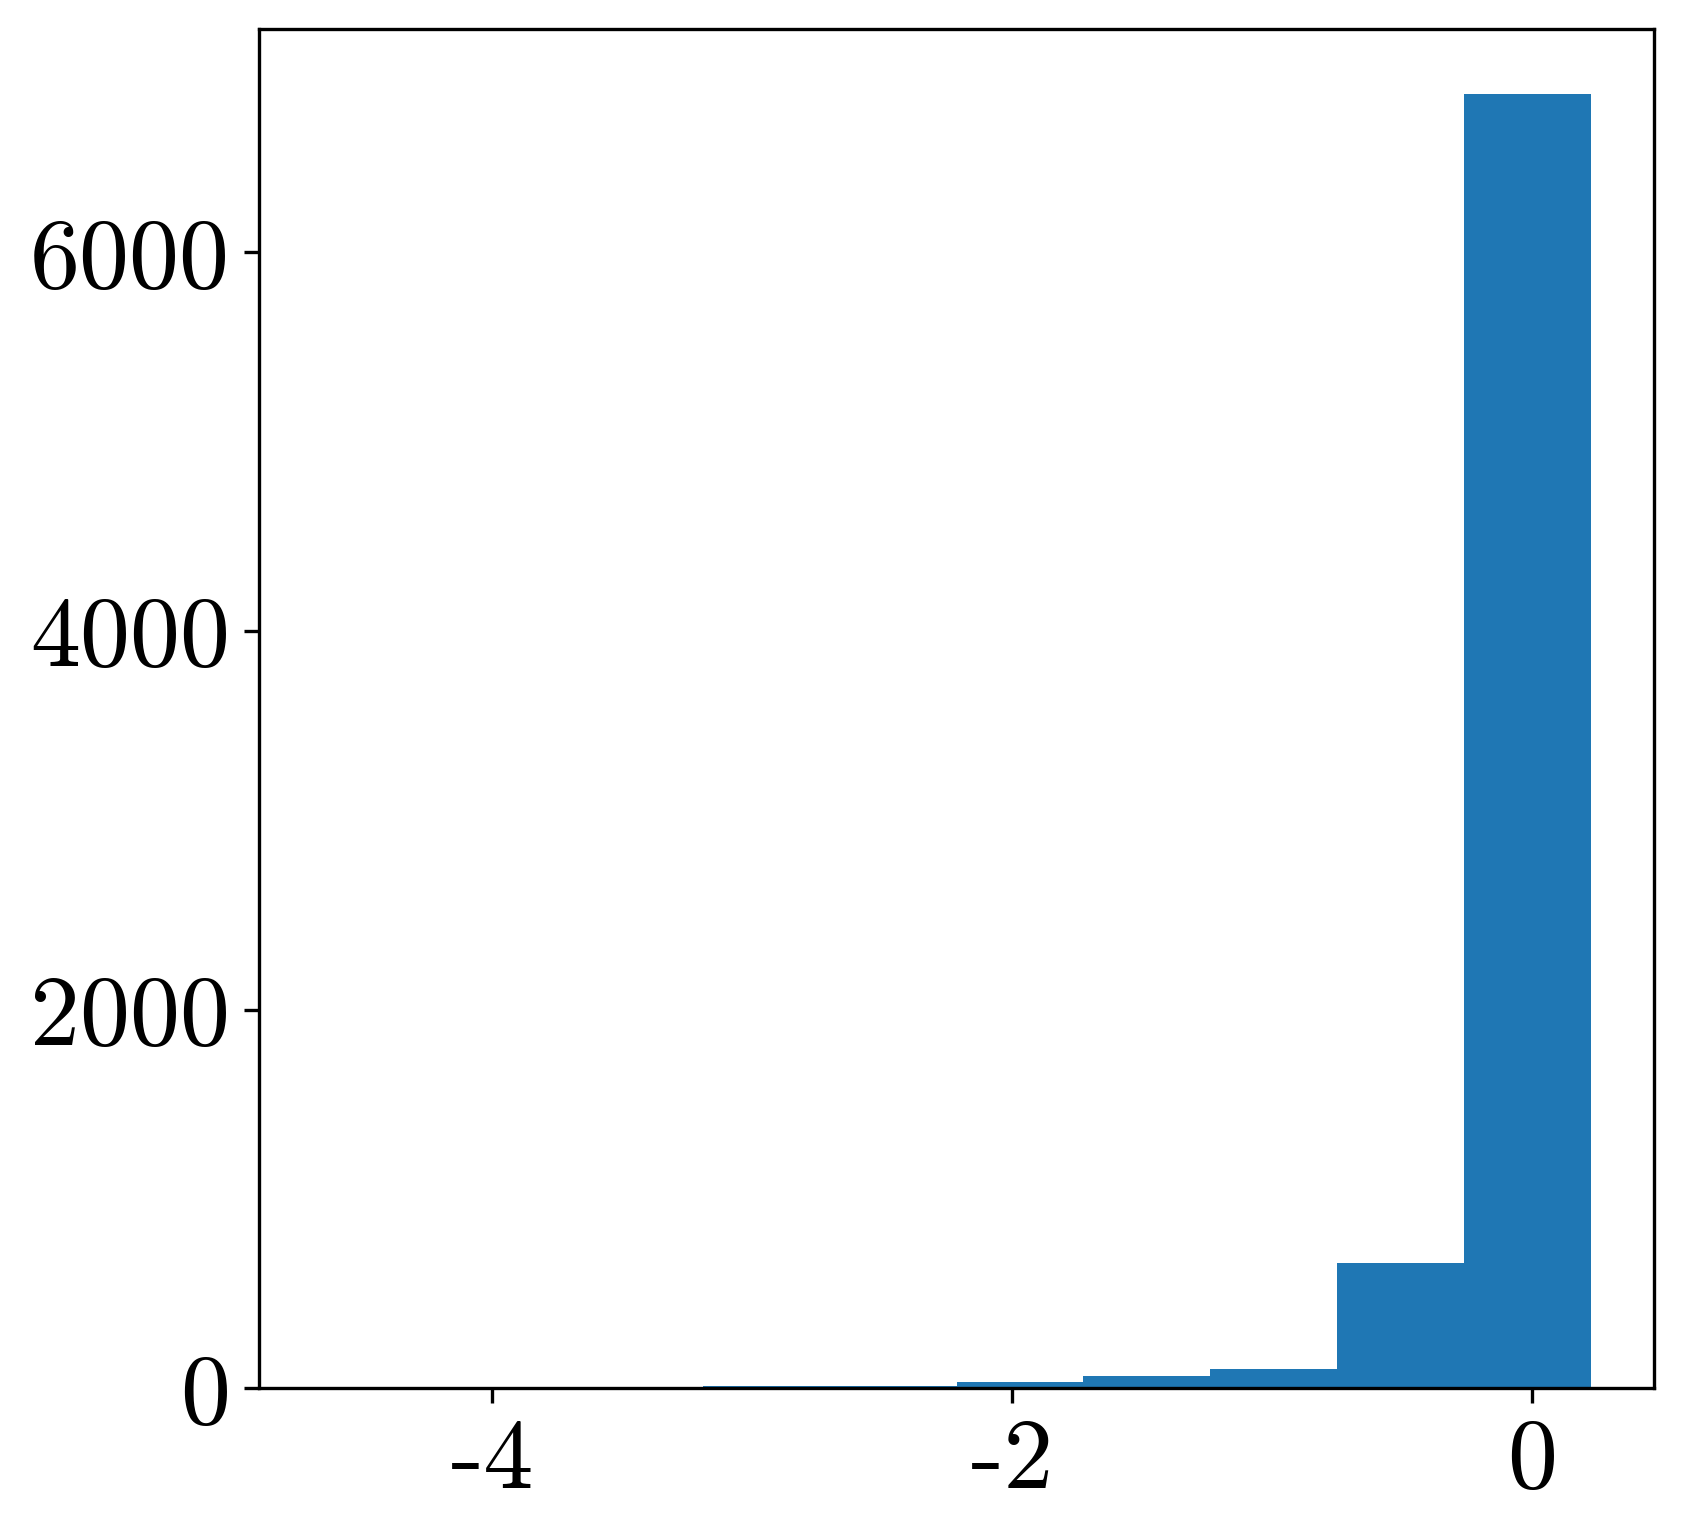

In [127]:
plt.hist(sc)

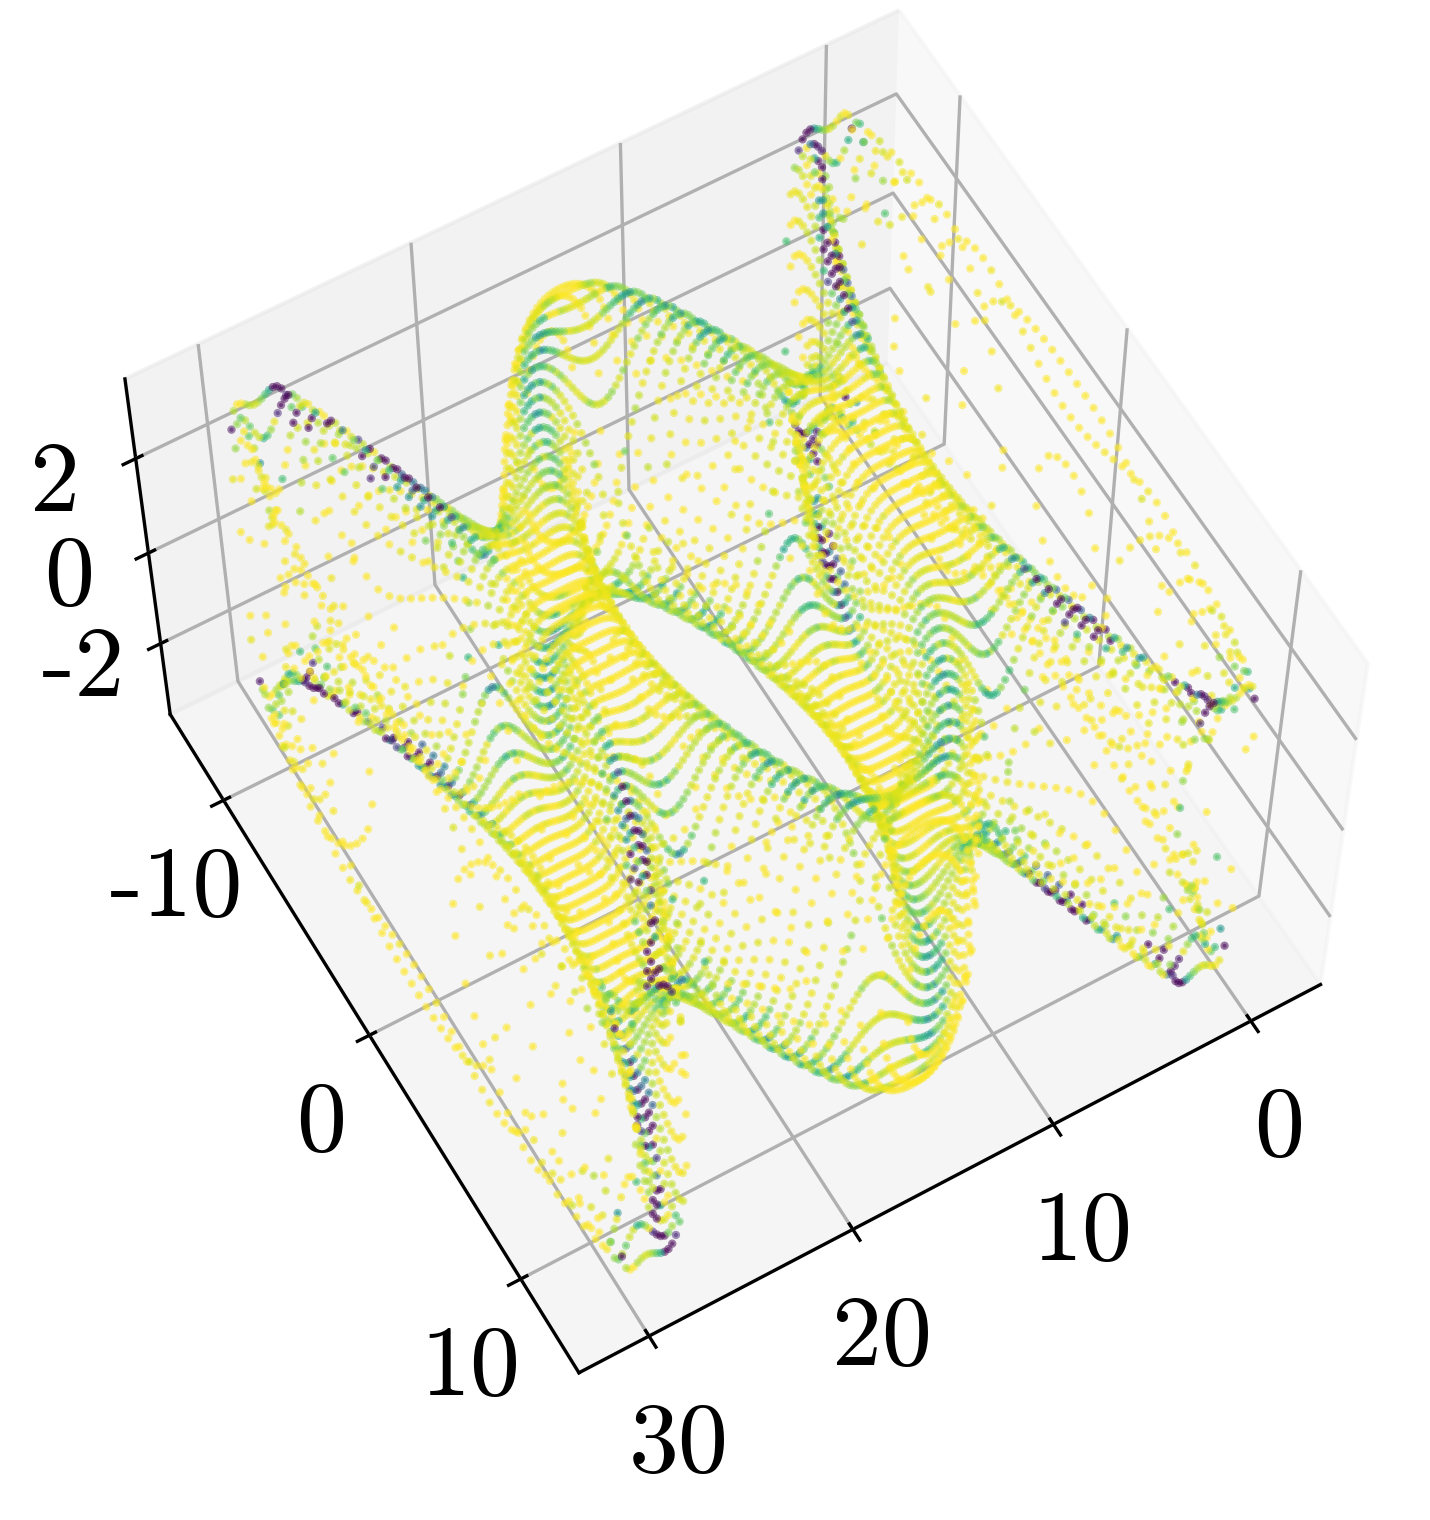

In [128]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
#ax.set_box_aspect([2,2,1])
#fig, ax = visualize_grid_torus(30,2,1)
#ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, c=sc, cmap='viridis',zorder=10, alpha=0.5)
ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, c=sc, cmap='viridis',zorder=10,norm = mpl.colors.Normalize(vmin=-1, vmax=0, clip=False), alpha=0.5)
ax.view_init(60, 60)
#ax.view_init(20, 100)


In [149]:
npoints = 10000
data = sample_torus(npoints,3,.5)

In [48]:
#data = sample_sphere(npoints)

In [120]:
data.shape

(10000, 3)

In [129]:
tensor_order = 1
p = tensor_order
k = manifold_dimensionality

In [180]:
npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 40, n=npoints)
_,_,_,_, h = get_second_fundamental_form(data, graph, 2)
riem, ric, sc = get_riemannian_ricci_scalar(h)
weitzenbock = get_weitzenbock_operator(riem,2,p)
block_weitzenbock = weitzenbock_to_bsr(weitzenbock)
tangents = make_tangents(data, graph, 2)
connection = make_connection(tangents, graph)
rough_lap = make_general_order_laplacian(connection, graph, p, sym=True, zero_trace=False)
#rough_lap = make_2nd_order_laplacian(connection, graph, sym=False, zero_trace=False)

100%|██████████| 7732/7732 [00:01<00:00, 4798.53it/s]


In [181]:
lichnerowicz = -rough_lap + block_weitzenbock

In [182]:
rough_lap.shape

(15464, 15464)

In [183]:
lichnerowicz.shape

(15464, 15464)

In [184]:
weitzenbock.shape

(7732, 2, 2)

In [185]:
eigvals = scipy.sparse.linalg.eigs(lichnerowicz, k=10, which='SM',return_eigenvectors=False)

In [186]:
eigvals = abs(eigvals.real)

In [187]:
eigvals

array([0.5987032 , 0.57783502, 0.56287335, 0.47239289, 0.35709954,
       0.34266337, 0.32228383, 0.31981577, 0.29040809, 0.28136145])

In [177]:
plt.hist

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

In [178]:
x = [r"$\lambda_{1}$",r"$\lambda_{2}$",r"$\lambda_{3}$",r"$\lambda_{4}$",r"$\lambda_{5}$",r"$\lambda_{6}$",r"$\lambda_{7}$",r"$\lambda_{8}$",r"$\lambda_{9}$",r"$\lambda_{10}$"]


Text(0.55, 0.1, '3-torus')

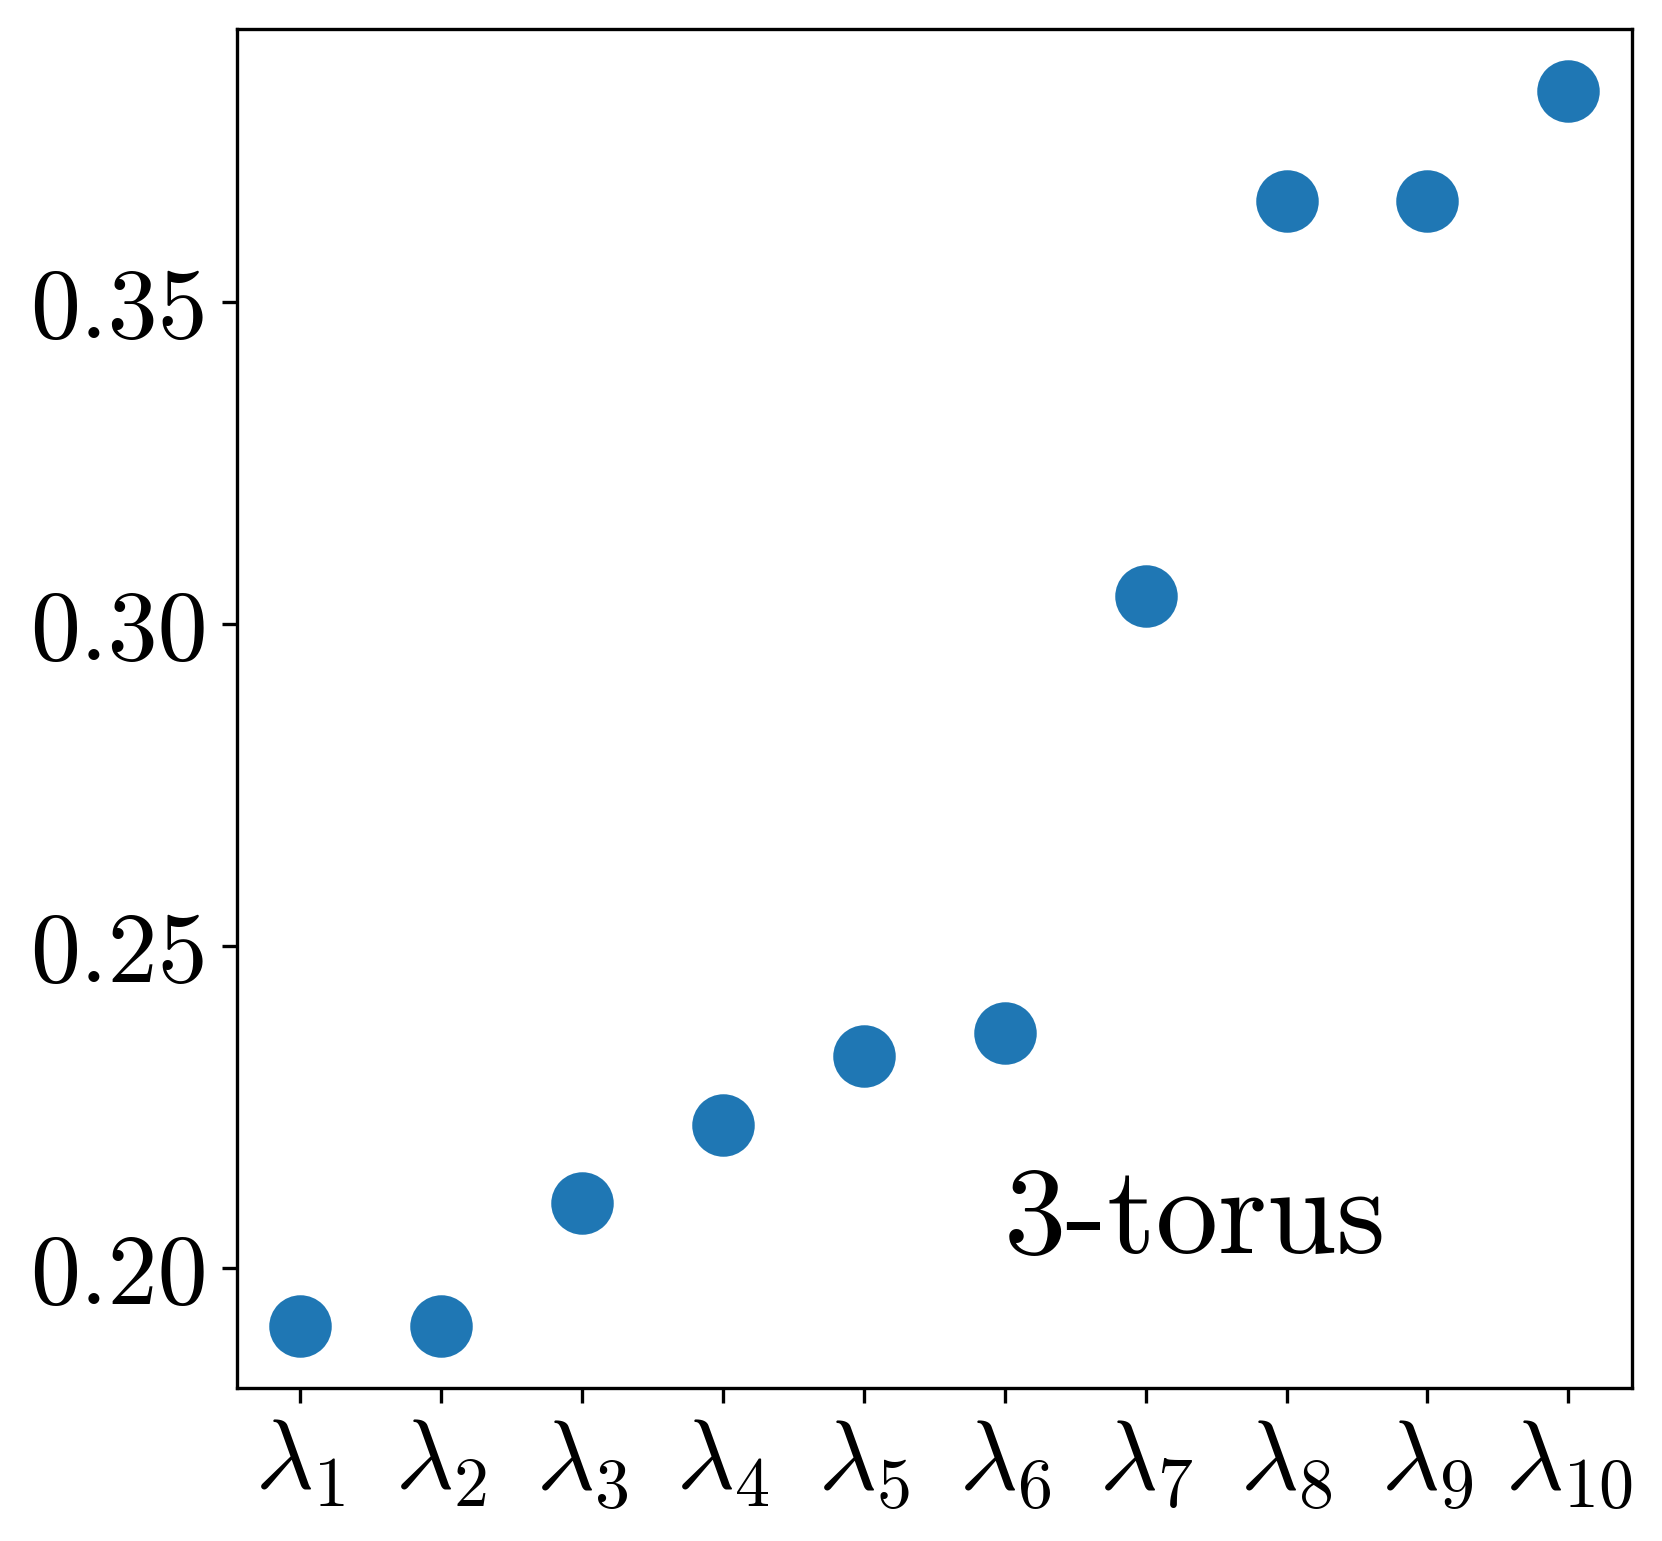

In [179]:
fig, ax = plt.subplots()
ax.plot(x, eigvals[::-1],marker='o',linestyle='None',markersize=14)
ax.text(0.55,0.1, r"3-torus", transform=ax.transAxes, fontsize=30)
#fig.savefig(f'../figures/Hodge_eigvals_Sphere.png')    
#fig.savefig(f'../figures/Hodge_eigvals_Sphere.pdf')

In [132]:
fig.savefig(f'../figures/HodgeDeRham_eigenvals_3torus.png')    
fig.savefig(f'../figures/HodgeDeRham_eigenvals_3torus.pdf')

In [6]:
import h5py    
import numpy as np 
from dataset import Dataset
import os

In [7]:
root = os.getcwd()

In [8]:
dataset_name = 'shapenetcorev2'


In [9]:
split = 'test'

In [69]:
d = Dataset(root=root, dataset_name=dataset_name, num_points=2048, split=split)

In [70]:
print("datasize:", d.__len__())

datasize: 2048


In [71]:
ps, lb, n, f = d[:]

In [72]:
np.where(np.array(n)=='mug')

(array([ 117,  248,  366,  371,  475,  777, 1002, 1928, 1940, 1997]),)

In [73]:
ps, lb, n, f = d[117]

In [74]:
data = ps.numpy()

In [75]:
data *= 15

In [76]:
npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 12, n=npoints)
tangents, normals, local_coords, h_total, true_h = get_second_fundamental_form(data, graph, 2)
riem, ric, sc = get_riemannian_ricci_scalar(true_h)

100%|██████████| 2048/2048 [00:00<00:00, 3640.90it/s]


(array([1.000e+00, 6.000e+00, 1.700e+01, 2.310e+02, 1.407e+03, 3.320e+02,
        4.500e+01, 7.000e+00, 1.000e+00, 1.000e+00]),
 array([-1.23377341, -0.94312176, -0.6524701 , -0.36181845, -0.07116679,
         0.21948486,  0.51013652,  0.80078817,  1.09143983,  1.38209149,
         1.67274314]),
 <BarContainer object of 10 artists>)

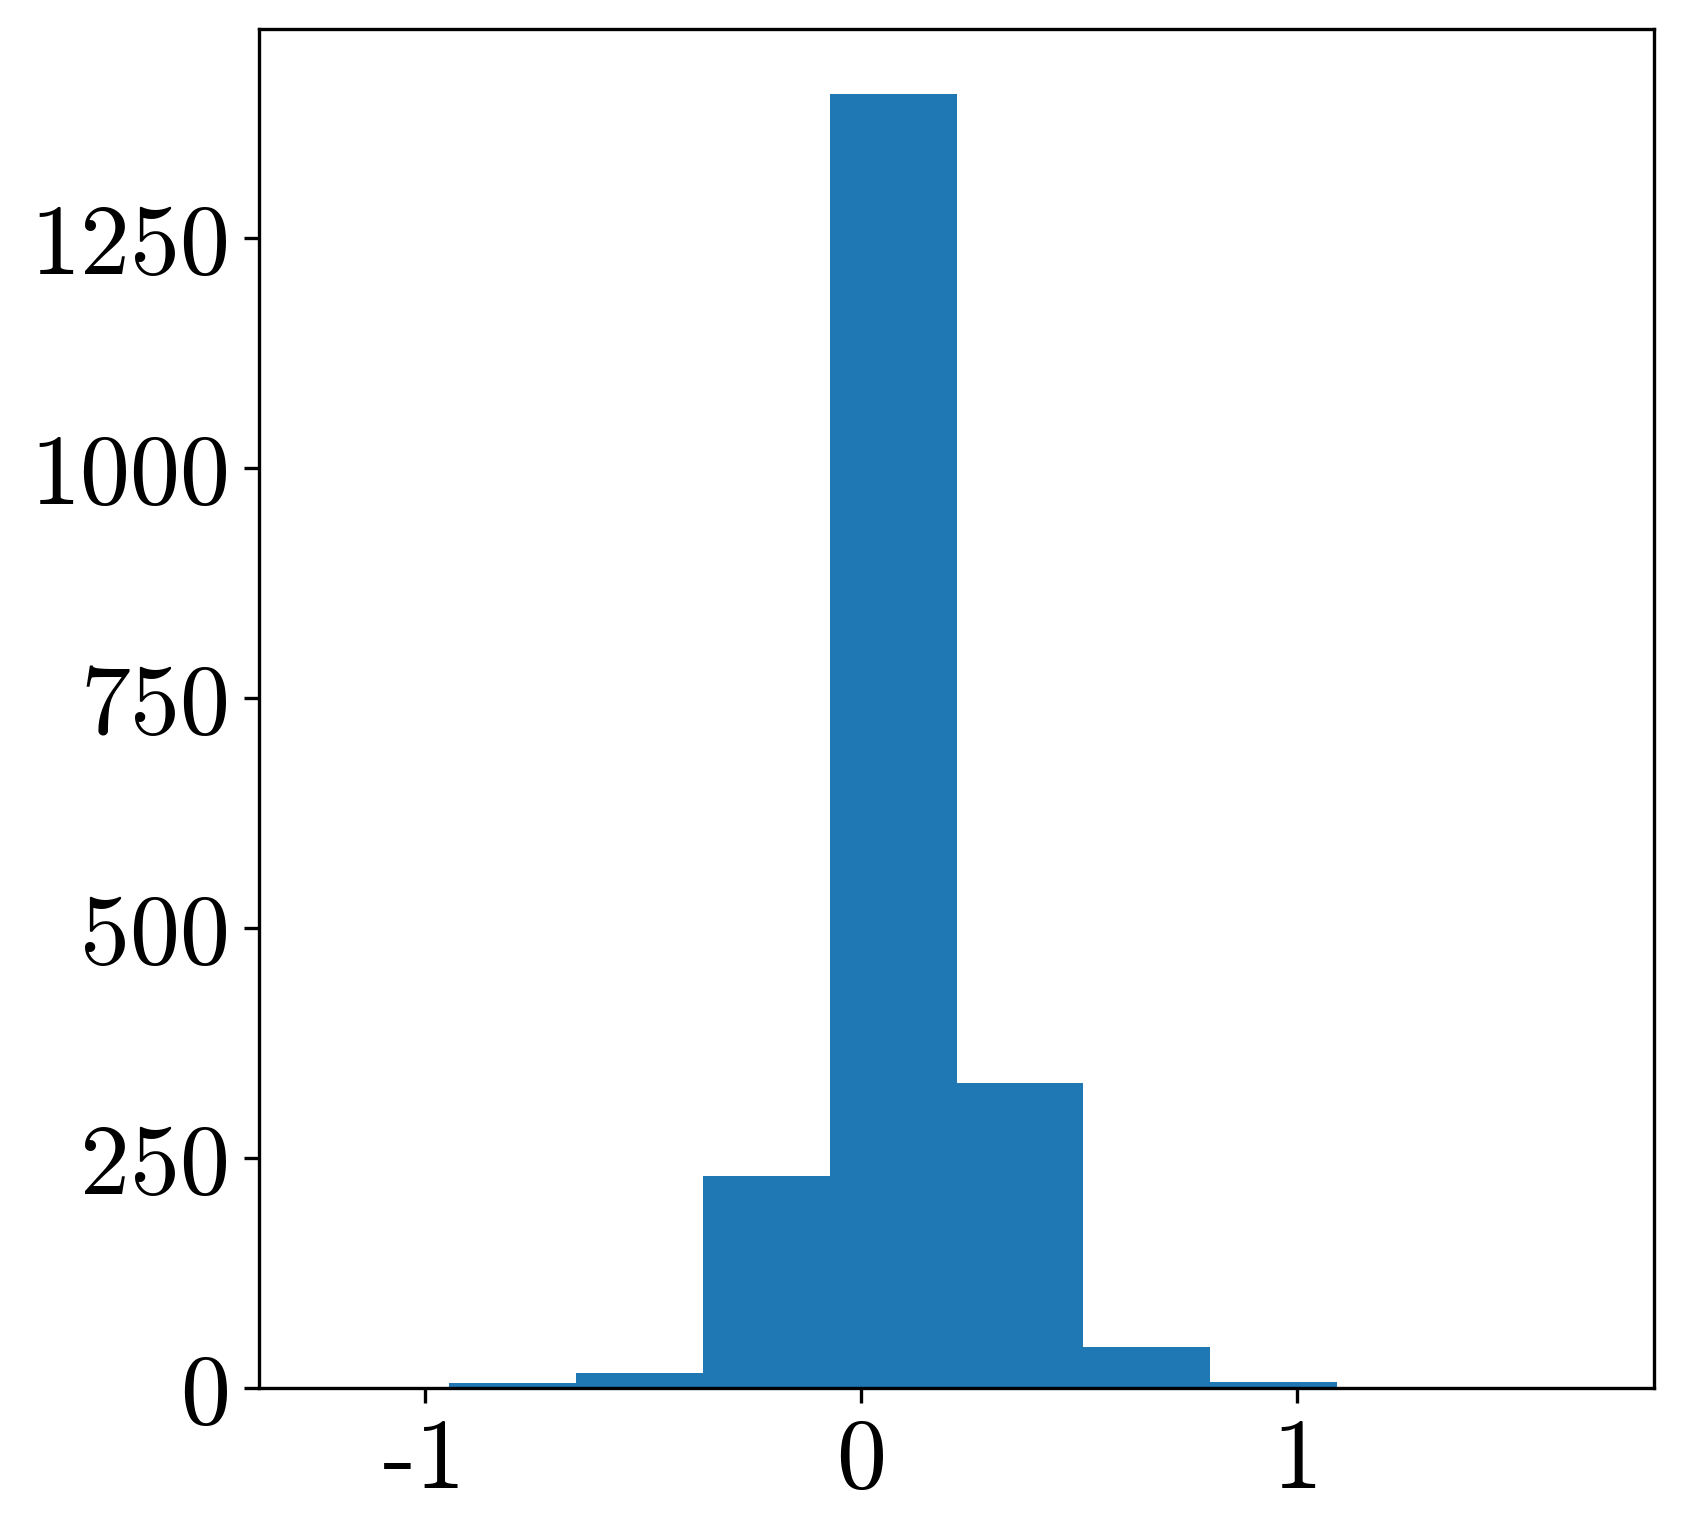

In [77]:
plt.hist(sc)

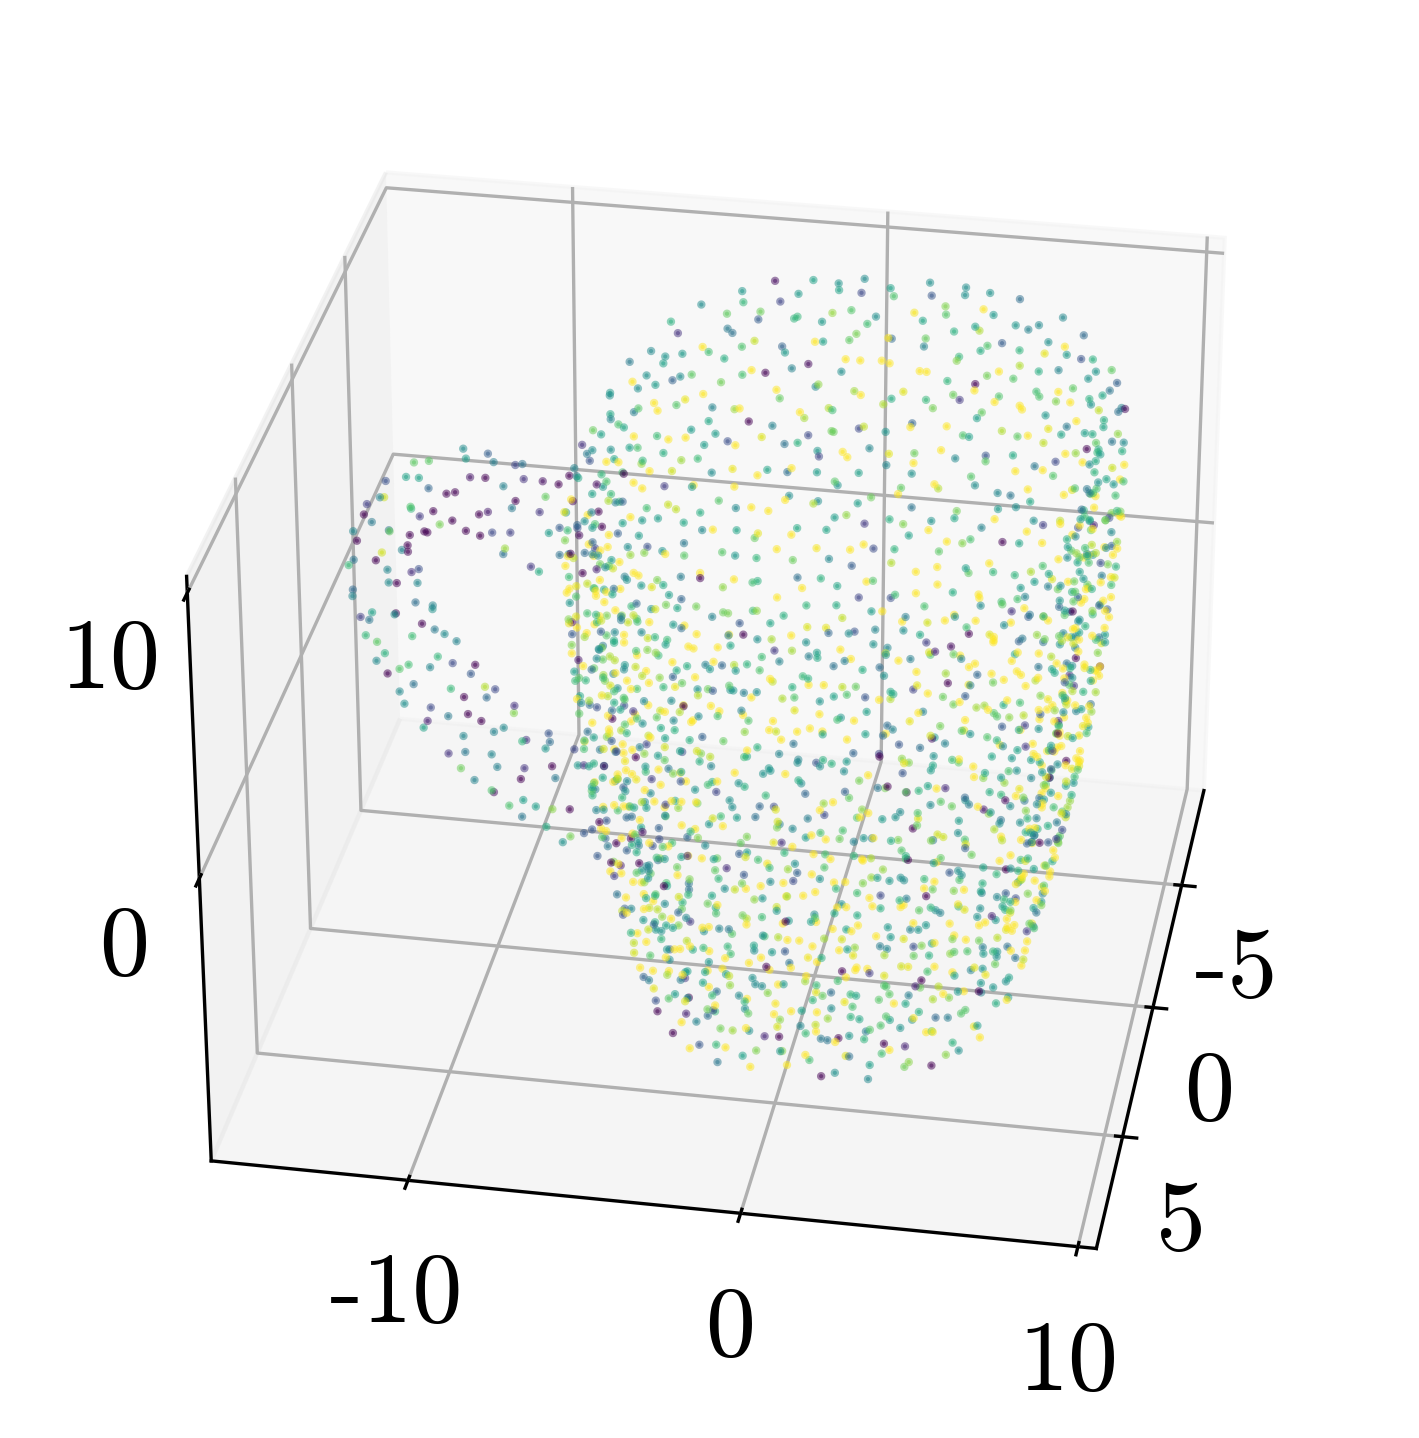

In [78]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
#ax.set_box_aspect([2,2,1])
#fig, ax = visualize_grid_torus(30,2,1)
#ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, c=sc, cmap='viridis',zorder=10, alpha=0.5)
ax.scatter(data[:,0], data[:, 2], data[:,1], s=1, c=sc, cmap='viridis',zorder=10,norm = mpl.colors.Normalize(vmin=-.2, vmax=.2, clip=False), alpha=0.5)
ax.view_init(30, 10)
#ax.view_init(20, 100)


In [ ]:
data = np.loadtxt('bunny2.txt')
#data = data[:, [0, 2, 1]]
data *= 10
np.random.shuffle(data)
npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 60, n=35947)

In [180]:
npoints = 20000
data = sample_torus(npoints,3,1)
#graph = make_nearest_neighbors_graph(data, 20, n=22998)
#data= sample_ellipsoid(npoints,4,2,2)
#data = sample_sphere(npoints)
#npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 10, n=npoints)
_,_,_,_, h = get_second_fundamental_form(data, graph, 2)
riem, ric, sc = get_riemannian_ricci_scalar(h)


100%|██████████| 20000/20000 [00:05<00:00, 3868.57it/s]


In [181]:
weitzenbock = get_weitzenbock_operator(riem, 2, 2)

In [182]:
weitzenbock.shape

(20000, 4, 4)

In [183]:
sorted_eig = get_eigvals_of_weitzenbock(weitzenbock, 2,2 )

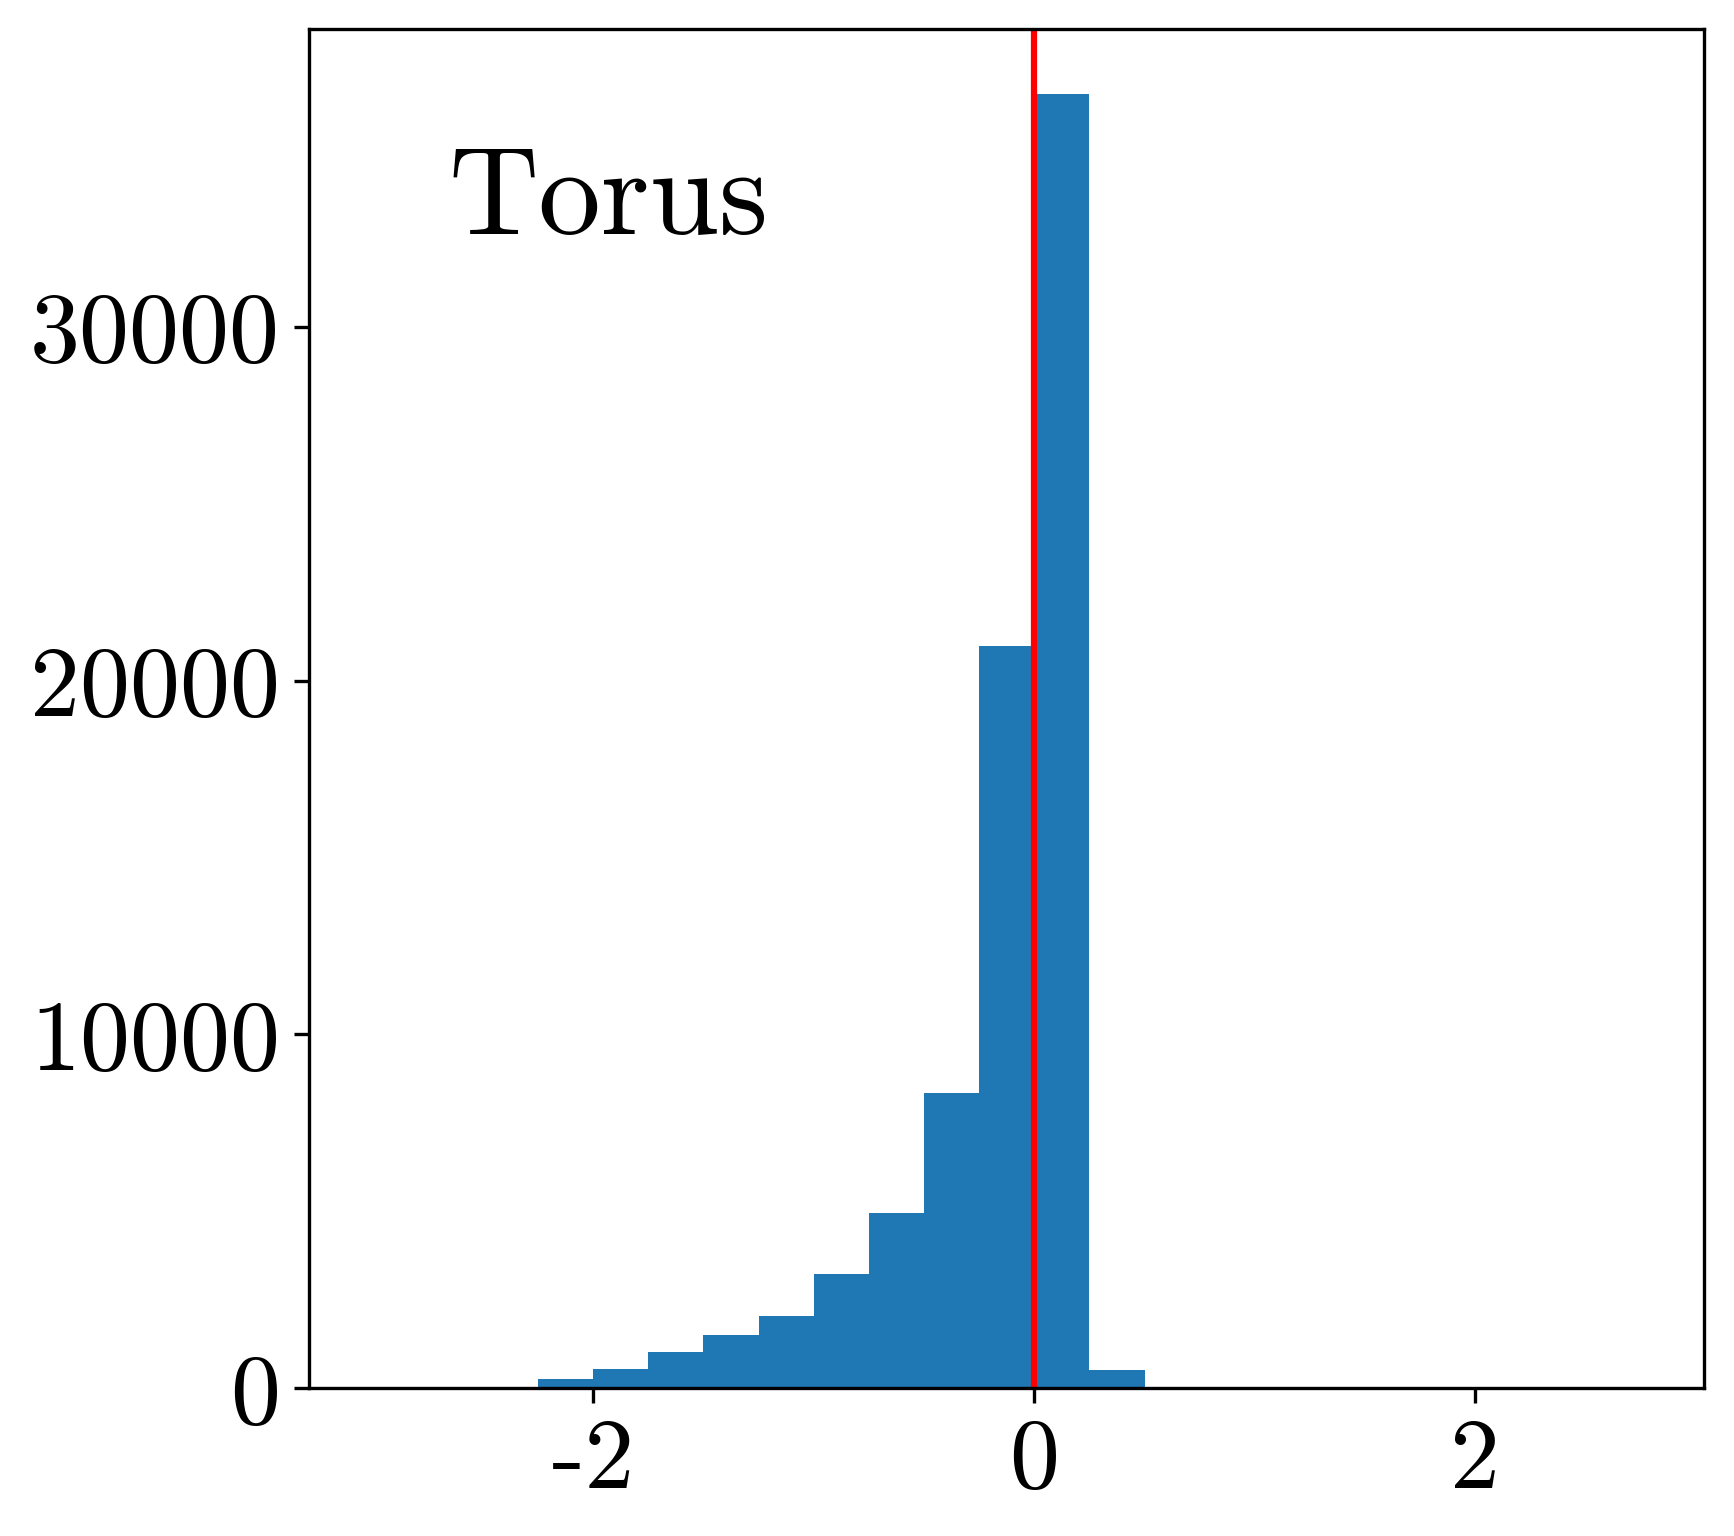

In [187]:
fig, ax = plt.subplots()
ax.hist(sorted_eig, bins = np.arange(-3,3,.25))
#ax.text(0.15,0.85, r"$S^2$", transform=ax.transAxes, fontsize=30)
ax.text(0.1,0.85, r"Torus", transform=ax.transAxes, fontsize=30)
#ax.text(0.1,0.78, r"surface", transform=ax.transAxes, fontsize=30)

ax.axvline(0, color='r')
fig.savefig(f'../figures/weitzenbock_eigenvals_torus.png')    
fig.savefig(f'../figures/weitzenbock_eigenvals_torus.pdf')


#plt.hist(sorted_eig, bins = np.arange(-3,3,.3));

In [84]:
data_s2 = sample_sphere(npoints)
data_s2 *= 10
s2_graph = make_nearest_neighbors_graph(data_s2, 10, n=npoints)
#s2_tangents, s2_normals, local_coords, s2triu, s2_h = get_second_fundamental_form(data_s2, s2_graph, 2)
_,_,_,_, s2_h = get_second_fundamental_form(data_s2, s2_graph, 2)

Riem, Ric, Scal = get_riemannian_ricci_scalar(s2_h)


100%|██████████| 20000/20000 [00:05<00:00, 3794.00it/s]


In [85]:
weitzenbock = get_weitzenbock_operator(Riem,2,2)
sorted_eig = get_eigvals_of_weitzenbock(weitzenbock, 2, 2)

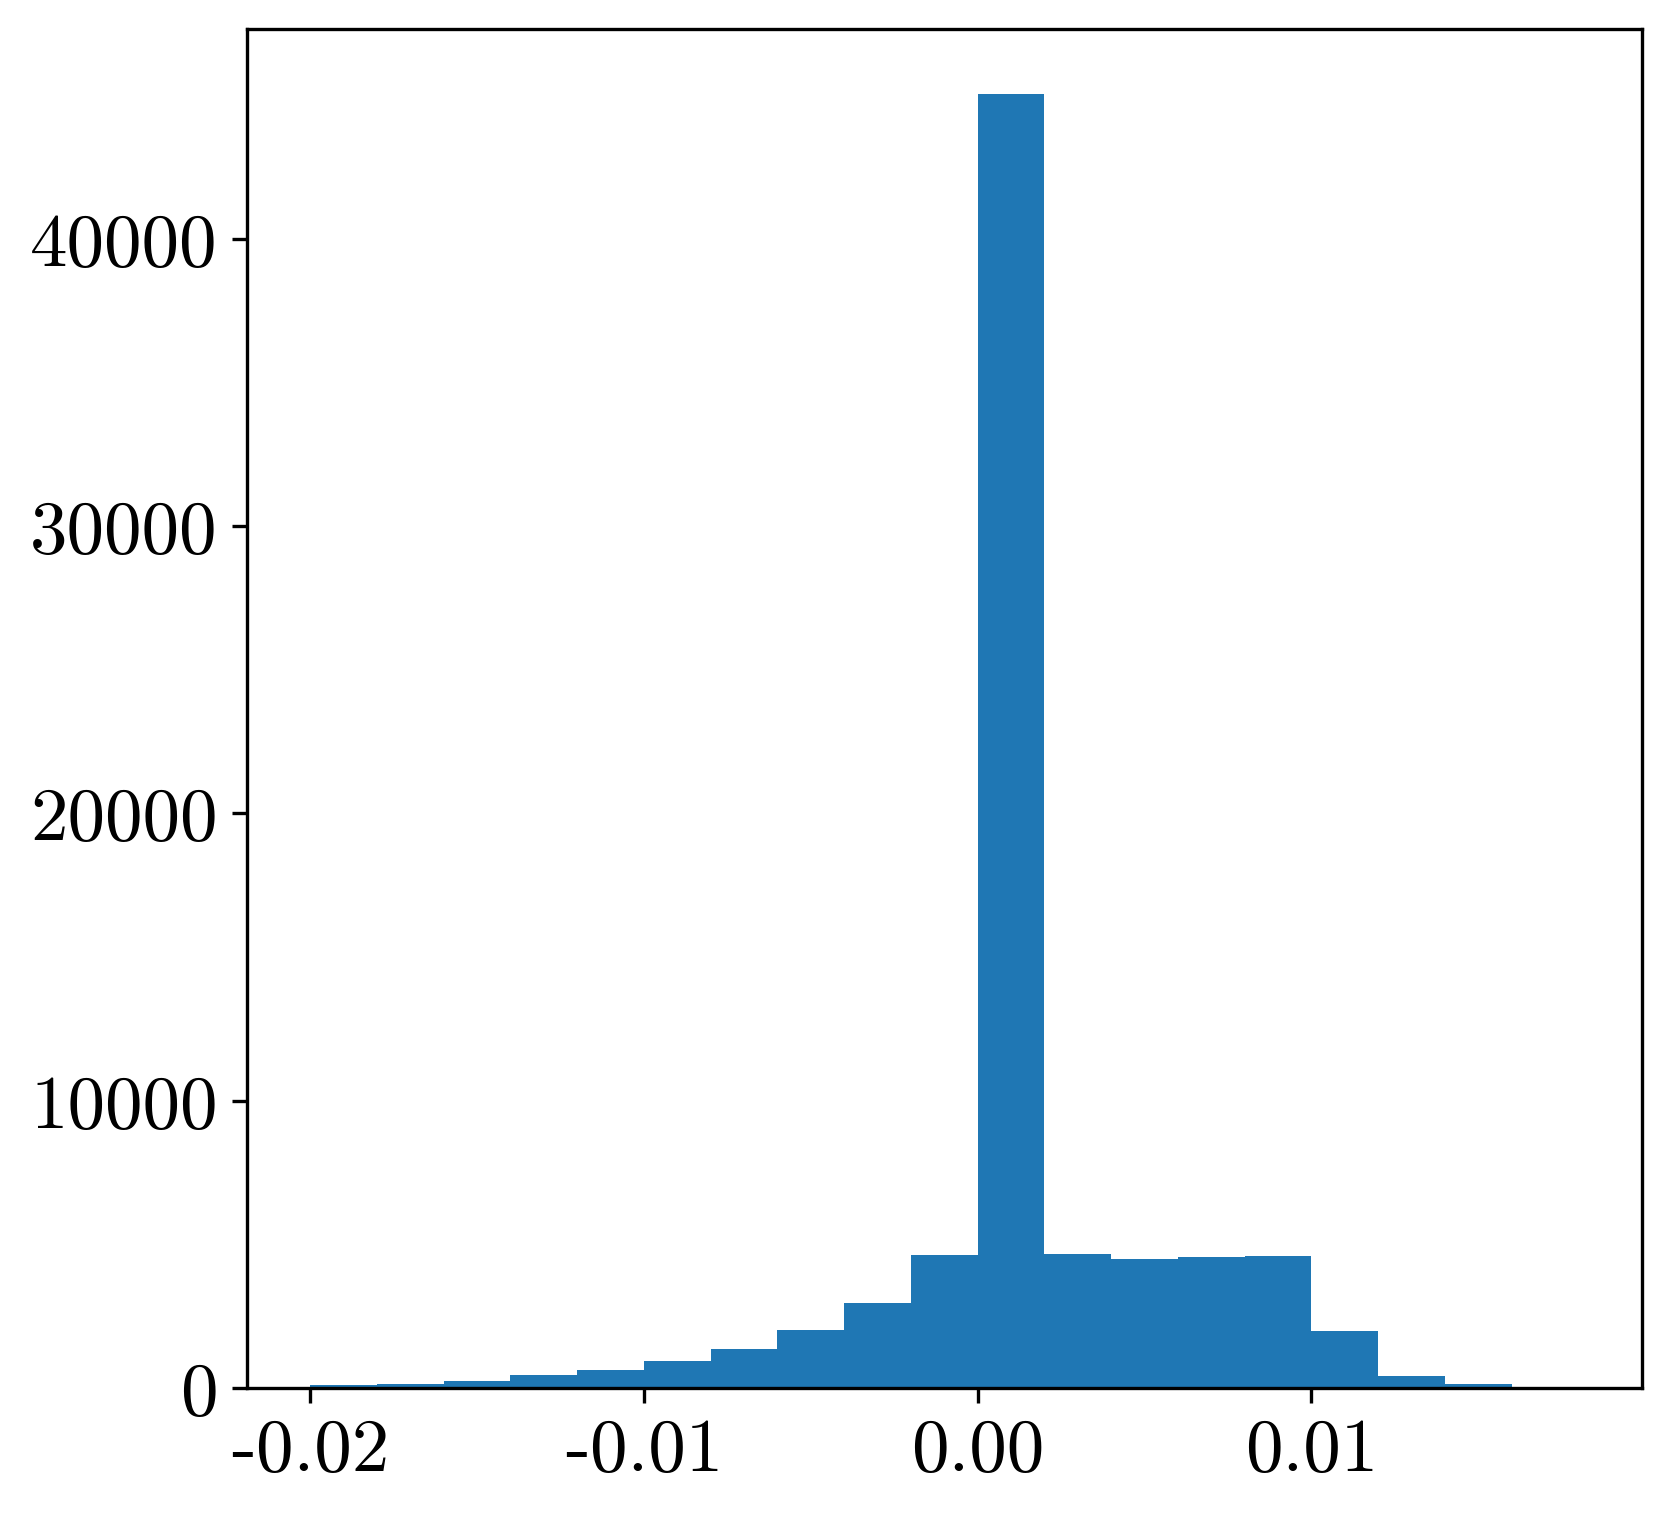

In [94]:
plt.hist(sorted_eig, bins = np.arange(-.02,.02,0.002));

In [95]:
data_t = sample_torus(npoints,2,1)
t_graph = make_nearest_neighbors_graph(data_t, 20, n=npoints)

100%|██████████| 20000/20000 [00:02<00:00, 7236.66it/s]


In [ ]:
vase = np.loadtxt('vase.txt')
vase_graph = make_nearest_neighbors_graph(vase, 60, n=10692)
_,_,_,_, vase_h = get_second_fundamental_form(vase, vase_graph, 2)
riem, ric, sc = get_riemannian_ricci_scalar(vase_h)

In [ ]:
verts = np.load('bunny.npy')
verts*=1000
bunny_graph = make_nearest_neighbors_graph(verts, 6, n=14904)
_,_,_,_, bunny_h = get_second_fundamental_form(verts, bunny_graph, 2)